In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data_f = pd.read_csv("student-mat.csv")
data_f



,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


Who drinks more?
People from complete families?
Partial families?
No parents?(

In [8]:
empty_cells = data_f["Pstatus"].isnull().sum()
print(f"Number of students which haven't told situation in family: {empty_cells}")
ind = data_f["Pstatus"].unique()
print(f"All possible situations: {ind}")
ind_guards = data_f["guardian"].unique()
ind_guards

Number of students which haven't told situation in family: 0
All possible situations: ['A' 'T']


array(['mother', 'father', 'other'], dtype=object)

In [68]:
incomplete_fam_mean = data_f.loc[data_f.Pstatus =="A"].Dalc.mean() + data_f.loc[data_f.Pstatus ==  "A"].Walc.mean()
complete_fam_mean = data_f.loc[data_f.Pstatus =="T"].Dalc.mean() + data_f.loc[data_f.Pstatus ==  "T"].Walc.mean()
orphans_cons_mean = data_f.loc[data_f.guardian == "other"].Dalc.mean() + data_f.loc[data_f.guardian == "other"].Walc.mean()
print(f"Consumption in complete families: {complete_fam_mean}")
print(f"Consumption in incomplete families: {incomplete_fam_mean}")
print(f"Consumption of alcohol between orphans: {orphans_cons_mean}")


Consumption in complete families: 3.7655367231638417
Consumption in incomplete families: 3.8292682926829267
Consumption of alcohol between orphans: 3.6875


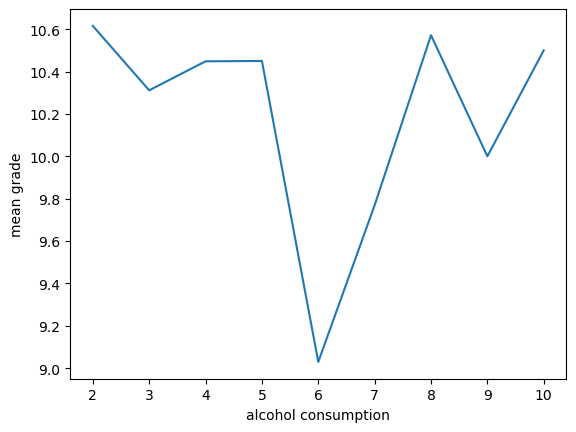

In [75]:
complete_fams = pd.DataFrame()
complete_fams["alcohol"] = data_f.loc[data_f.Pstatus =="T"].Dalc + data_f.loc[data_f.Pstatus =="T"].Walc 
complete_fams["grades"] = data_f.loc[data_f.Pstatus =="T"].G3

complete_fams = complete_fams.groupby("alcohol").grades.mean()

plt.plot(complete_fams.index.tolist(), complete_fams.values.tolist())
plt.xlabel('alcohol consumption')
plt.ylabel('mean grade')
plt.show()


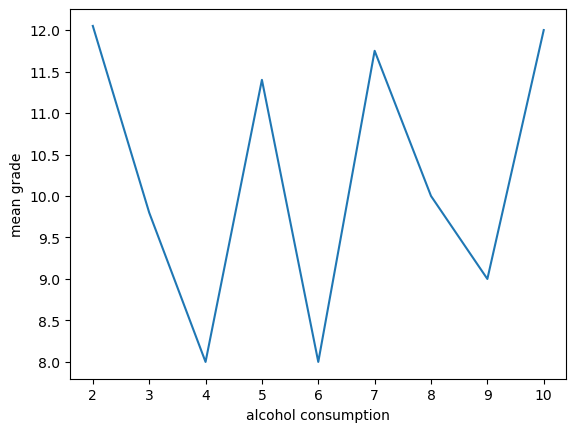

In [76]:

incomplete_fams = pd.DataFrame()
incomplete_fams["alcohol"] = data_f.loc[data_f.Pstatus =="A"].Dalc + data_f.loc[data_f.Pstatus =="A"].Walc 
incomplete_fams["grades"] = data_f.loc[data_f.Pstatus =="A"].G3

incomplete_fams = incomplete_fams.groupby("alcohol").grades.mean()

plt.plot(incomplete_fams.index.tolist(), incomplete_fams.values.tolist())
plt.xlabel('alcohol consumption')
plt.ylabel('mean grade')
plt.show()


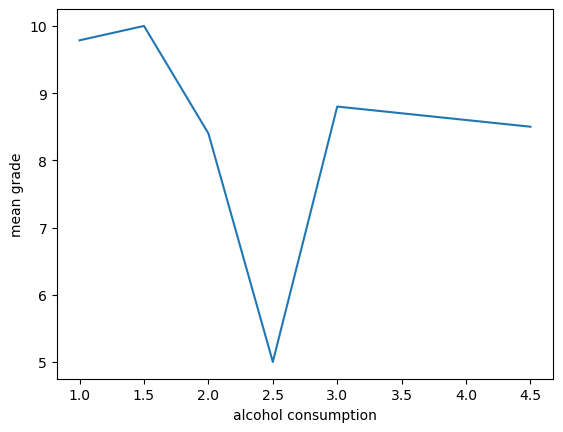

In [78]:

incomplete_fams = pd.DataFrame()
incomplete_fams["alcohol"] = (data_f.loc[data_f.guardian =="other"].Dalc + data_f.loc[data_f.guardian =="other"].Walc)/2 
incomplete_fams["grades"] = data_f.loc[data_f.guardian =="other"].G3

incomplete_fams = incomplete_fams.groupby("alcohol").grades.mean()

plt.plot(incomplete_fams.index.tolist(), incomplete_fams.values.tolist())
plt.xlabel('alcohol consumption')
plt.ylabel('mean grade')
plt.show()


In [79]:
internet_suburbian = data_f.groupby("internet").apply(lambda x: x.traveltime.mean())

print(f"Mean distance to school of pupils with out internet {internet_suburbian.no:.2f}")
print(f"Mean distance to school of pupils with internet {internet_suburbian.yes:.2f}")


Mean distance to school of pupils with out internet 1.62
Mean distance to school of pupils with internet 1.41


NameError: name 'np' is not defined

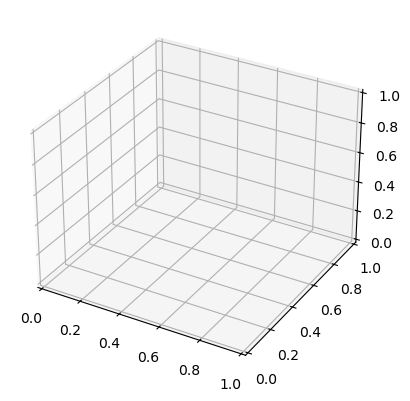

In [96]:
alc_stud_health = data_f.loc[: , ["Dalc", "Walc", "health", "studytime"]]
alc_stud_health["alcohol"] = alc_stud_health.Dalc + alc_stud_health.Walc
alc_stud_health.drop(["Dalc", "Walc"], axis = 1, inplace = True)
alc_stud_health

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
hist, xedges, yedges = np.histogram2d(alc_stud_health.alcohol, alc_stud_health.studytime,bins=4)
# Construct arrays for the anchor positions of the 16 bars.

# Construct arrays with the dimensions for the 16 bars.
dx = dy = 0.5 * np.ones_like(zpos)
dz = hist.ravel()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')

plt.show()